# Using Cleaned Two Year Data

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(6,6)}) 
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [54]:
recid = pd.read_csv("compas-scores-two-years.csv")

In [55]:
pd.set_option('max_columns', 53)

In [56]:
drop_columns = ['compas_screening_date', 'juv_fel_count',
                'juv_misd_count','c_case_number','vr_charge_degree',
                'vr_offense_date','vr_charge_desc','c_arrest_date',
                'r_case_number', 'vr_case_number','start',
                'juv_other_count','days_b_screening_arrest','c_days_from_compas','first','last']
recid = recid.drop(drop_columns,axis=1)

In [57]:
recid.head()

,id,name,sex,dob,age,age_cat,race,decile_score,priors_count,c_jail_in,c_jail_out,c_offense_date,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,end,event,two_year_recid
0,1,miguel hernandez,Male,1947-04-18,69,Greater than 45,Other,1,0,2013-08-13 06:03:42,2013-08-14 05:41:20,2013-08-13,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,327,0,0
1,3,kevon dixon,Male,1982-01-22,34,25 - 45,African-American,3,0,2013-01-26 03:45:27,2013-02-05 05:36:53,2013-01-26,F,Felony Battery w/Prior Convict,1,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,159,1,1
2,4,ed philo,Male,1991-05-14,24,Less than 25,African-American,4,4,2013-04-13 04:58:34,2013-04-14 07:02:04,2013-04-13,F,Possession of Cocaine,1,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,63,0,1
3,5,marcu brown,Male,1993-01-21,23,Less than 25,African-American,8,1,NaN,NaN,2013-01-12,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,1174,0,0
4,6,bouthy pierrelouis,Male,1973-01-22,43,25 - 45,Other,1,2,NaN,NaN,NaN,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,1102,0,0


# Model for Caucasians

In [58]:
df_white = recid[recid.race == 'Caucasian']

In [59]:
df_nums = df_white.select_dtypes(np.number).fillna(0)

In [60]:
target_variable = 'two_year_recid'
independent_variables = df_nums.drop(columns=target_variable).columns

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [62]:
X = df_nums[independent_variables]
y = df_nums[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [63]:
model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
true_classes = y_test
prediction_probabilities = model.predict_proba(X_test)

In [64]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(true_classes, predictions)

array([[276,   5],
       [  6, 204]], dtype=int64)

This confusion matrix shows 5 false positives and 6 false negatives

In [65]:
#Accuracy
from sklearn import metrics
metrics.accuracy_score(true_classes, predictions)

0.9775967413441955

In [66]:
#Precision
metrics.precision_score(true_classes, predictions)

0.9760765550239234

In [67]:
#Recall
metrics.recall_score(true_classes, predictions)

0.9714285714285714

In [68]:
#F1
metrics.f1_score(true_classes, predictions)

0.973747016706444

In [69]:
#Area Under The Curve
metrics.roc_auc_score(true_classes, predictions)

0.9768174885612608

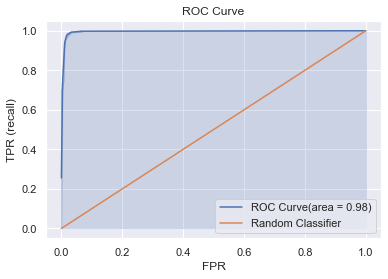

In [70]:
def roc_curve(true_classes, predictions, prediction_probabilities):
    fpr, tpr, _ = metrics.roc_curve(true_classes, prediction_probabilities[:,1])
    roc_auc = metrics.roc_auc_score(true_classes, predictions)

    sns.mpl.pyplot.fill_between(fpr, tpr, step='post', alpha=0.2,color='b')
    sns.lineplot(x=fpr, y=tpr, linestyle='--', label='ROC Curve(area = %0.2f)' % roc_auc)
    sns.lineplot(x=[0,1], y= [0,1], linestyle='--', label = 'Random Classifier')
    
    sns.mpl.pyplot.xlabel('FPR')
    sns.mpl.pyplot.ylabel('TPR (recall)')
    sns.mpl.pyplot.title('ROC Curve')

roc_curve(true_classes, predictions, prediction_probabilities)

# Model for African Americans

In [71]:
df_af = recid[recid.race == 'African-American']

In [72]:
df_nums_af = df_af.select_dtypes(np.number).fillna(0)

In [73]:
target_variable = 'two_year_recid'
independent_variables = df_nums_af.drop(columns=target_variable).columns

In [74]:
X = df_nums_af[independent_variables]
y = df_nums_af[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [82]:
model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
true_classes = y_test
prediction_probabilities = model.predict_proba(X_test)

In [83]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(true_classes, predictions)

array([[356,  15],
       [  2, 367]], dtype=int64)

This confusion matrix shows 15 false positives and 2 false negatives

In [84]:
#Accuracy
metrics.accuracy_score(true_classes, predictions)

0.977027027027027

In [85]:
#Precision
metrics.precision_score(true_classes, predictions)

0.9607329842931938

In [86]:
#Recall
metrics.recall_score(true_classes, predictions)

0.994579945799458

In [87]:
#F1
metrics.f1_score(true_classes, predictions)

0.9773635153129161

In [88]:
#Area Under The Curve
metrics.roc_auc_score(true_classes, predictions)

0.9770743394765483

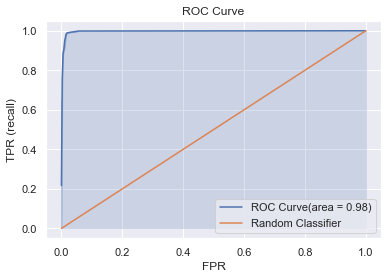

In [41]:
def roc_curve(true_classes, predictions, prediction_probabilities):
    fpr, tpr, _ = metrics.roc_curve(true_classes, prediction_probabilities[:,1])
    roc_auc = metrics.roc_auc_score(true_classes, predictions)

    sns.mpl.pyplot.fill_between(fpr, tpr, step='post', alpha=0.2,color='b')
    sns.lineplot(x=fpr, y=tpr, linestyle='--', label='ROC Curve(area = %0.2f)' % roc_auc)
    sns.lineplot(x=[0,1], y= [0,1], linestyle='--', label = 'Random Classifier')
    
    sns.mpl.pyplot.xlabel('FPR')
    sns.mpl.pyplot.ylabel('TPR (recall)')
    sns.mpl.pyplot.title('ROC Curve')

roc_curve(true_classes, predictions, prediction_probabilities)

## Key Takeaways from the Data

- African Americans have a larger percentage of false positives, meaning more of them were predicted to recid but ended up not doing so, while Caucasians have a larger percentage of false negatives, meaning more of them were predicted to not recid but ending up re-committing crimes.

- Caucasian Precision(0.98) vs African-American Precision(0.96): Because the Caucasian model had less false positives, there was a higher precision.

- Caucasian Recall(0.97) vs African-American Recall(0.99): Because the Caucasian model had more false negatives, there was a lower recall.
